# Basic usage of pytidycensus

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mmann1123/pytidycensus/blob/main/examples/01_basic_usage.ipynb)

This notebook demonstrates the basic functionality of **pytidycensus**, a Python library for accessing US Census Bureau data with pandas and GeoPandas support.

## Setup

First, let's install and import the necessary packages:

In [13]:
# Uncomment to install if running in Colab
# !pip install pytidycensus matplotlib

import pytidycensus as tc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
plt.style.use('default')
sns.set_palette("husl")

## Census API Key

To use pytidycensus, you need a free API key from the US Census Bureau. Get one at: https://api.census.gov/data/key_signup.html

Set your API key:

In [ ]:
# Replace with your actual API key
tc.set_census_api_key("Your API Key Here")

# # Alternatively, set as environment variable:
# import os
# os.environ['CENSUS_API_KEY'] = 'Your API Key Here'

Ignore this cell. I am just loading my credentials from a yaml file in the parent directory.

In [15]:
import os
# Try to get API key from environment
api_key = os.environ.get("CENSUS_API_KEY")

# For documentation builds without a key, we'll mock the responses
try:
    tc.set_census_api_key(api_key)
    print("Using Census API key from environment")
except Exception:
    print("Using example API key for documentation")
    # This won't make real API calls during documentation builds
    tc.set_census_api_key("EXAMPLE_API_KEY_FOR_DOCS")

Census API key has been set for this session.
Using Census API key from environment


## Core Functions

pytidycensus provides two main functions:

- **`get_decennial()`**: Access to 2000, 2010, and 2020 decennial US Census APIs
- **`get_acs()`**: Access to 1-year and 5-year American Community Survey APIs

### Example: Median Age by State (2020 Census)

Let's look at median age by state from the 2020 Census:

In [16]:
# Get median age by state from 2020 Census
age_2020 = tc.get_decennial(
    geography="state",
    variables="P13_001N",  # Median age variable
    year=2020,
    sumfile="dhc"  # Demographic and Housing Characteristics file
)

print(f"Data shape: {age_2020.shape}")
age_2020.head()

Getting data from the 2020 decennial Census
Using the Demographic and Housing Characteristics File
Data shape: (52, 5)


/home/mmann1123/Documents/github/pytidycensus/pytidycensus/decennial.py:429: UserWarning: Note: 2020 decennial Census data use differential privacy, a technique that introduces errors into data to preserve respondent confidentiality. Small counts should be interpreted with caution. See https://www.census.gov/library/fact-sheets/2021/protecting-the-confidentiality-of-the-2020-census-redistricting-data.html for additional guidance.
  warnings.warn(


,state,GEOID,NAME,variable,estimate
0,09,09,Connecticut,P13_001N,41.1
1,10,10,Delaware,P13_001N,41.1
2,11,11,DC,P13_001N,33.9
3,12,12,Florida,P13_001N,43.0
4,13,13,Georgia,P13_001N,37.5


The function returns a pandas DataFrame with four columns:

- **`GEOID`**: Identifier for the geographical unit
- **`NAME`**: Descriptive name of the geographical unit  
- **`variable`**: Census variable represented in the row
- **`value`**: Value of the variable for that unit

### Visualizing the Data

Since we have a tidy DataFrame, we can easily visualize it:

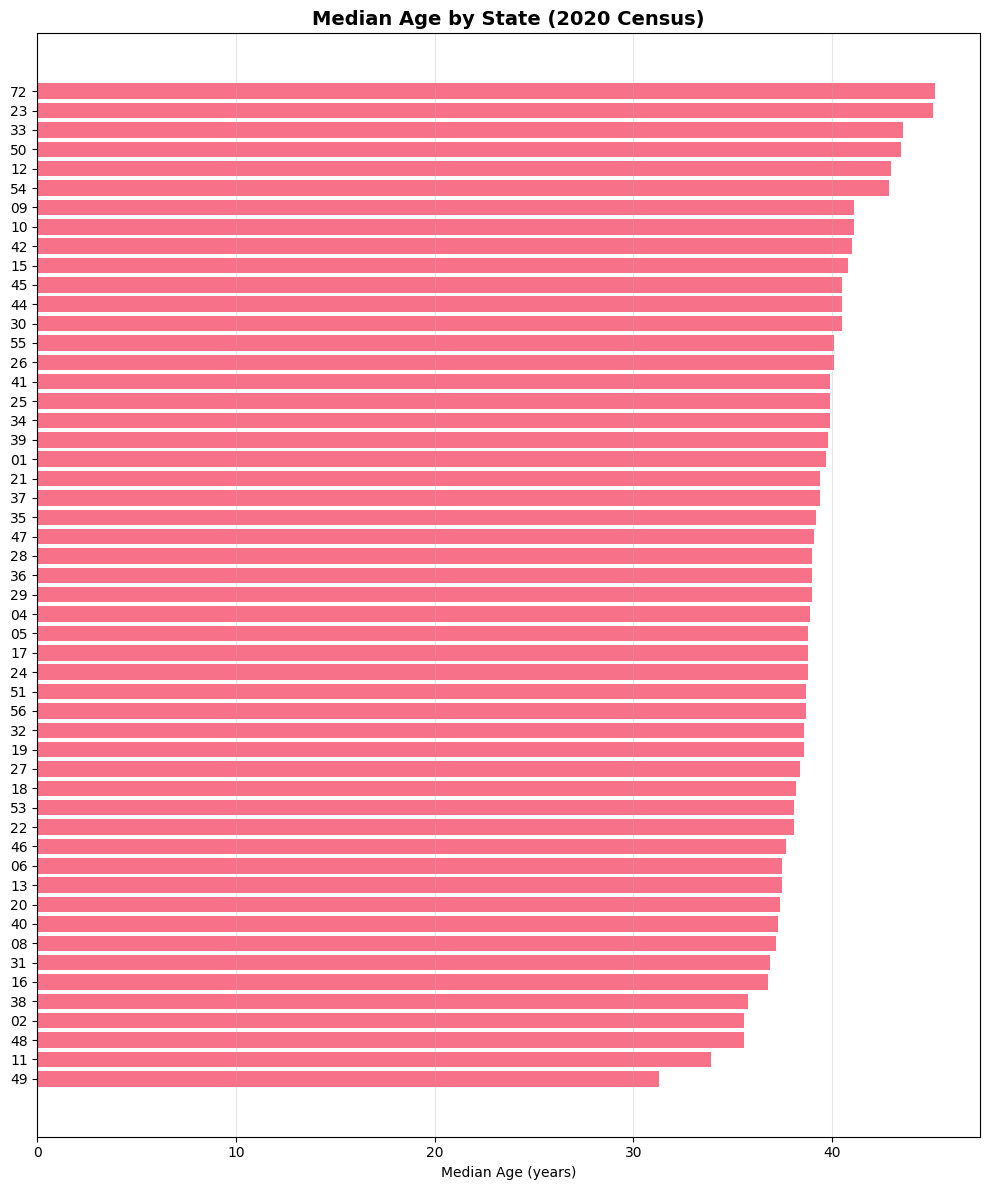

In [17]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 12))

# Sort by median age and plot
age_sorted = age_2020.sort_values('estimate', ascending=True).reset_index(drop=True)
plt.barh(range(len(age_sorted)), age_sorted['estimate'])
plt.yticks(range(len(age_sorted)), age_sorted['state'])
plt.xlabel('Median Age (years)')
plt.title('Median Age by State (2020 Census)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Geography in pytidycensus

pytidycensus supports many geographic levels. Here are the most commonly used:

| Geography | Definition | Example Usage |
|-----------|------------|---------------|
| `"us"` | United States | National data |
| `"state"` | State or equivalent | State-level data |
| `"county"` | County or equivalent | County-level data |
| `"tract"` | Census tract | Neighborhood-level data |
| `"block group"` | Census block group | Sub-neighborhood data |
| `"place"` | Census-designated place | City/town data |
| `"zcta"` | ZIP Code Tabulation Area | ZIP code areas |

### Example: County Data

Let's get population data for counties in Texas:

In [18]:
# Get total population for Texas counties
tx_pop = tc.get_decennial(
    geography="county",
    variables="P1_001N",  # Total population
    state="TX",  # Filter to Texas
    year=2020
)

print(f"Number of Texas counties: {len(tx_pop)}")
tx_pop.head()

Getting data from the 2020 decennial Census
Using the PL 94-171 Redistricting Data Summary File
Number of Texas counties: 254


/home/mmann1123/Documents/github/pytidycensus/pytidycensus/decennial.py:429: UserWarning: Note: 2020 decennial Census data use differential privacy, a technique that introduces errors into data to preserve respondent confidentiality. Small counts should be interpreted with caution. See https://www.census.gov/library/fact-sheets/2021/protecting-the-confidentiality-of-the-2020-census-redistricting-data.html for additional guidance.
  warnings.warn(


,state,county,GEOID,NAME,variable,estimate
0,48,001,48001,"Anderson County, Texas",P1_001N,57922
1,48,003,48003,"Andrews County, Texas",P1_001N,18610
2,48,005,48005,"Angelina County, Texas",P1_001N,86395
3,48,007,48007,"Aransas County, Texas",P1_001N,23830
4,48,009,48009,"Archer County, Texas",P1_001N,8560


## Searching for Variables

The Census has thousands of variables. Use `load_variables()` to search for what you need:

In [19]:
# Load variables for 2022 5-year ACS
variables_2022 = tc.load_variables(2022, "acs", "acs5", cache=True)

print(f"Total variables available: {len(variables_2022)}")
variables_2022.head()

Loaded cached variables for 2022 acs acs5
Total variables available: 28193


,name,label,concept,predicateType,group,limit,table
0,AIANHH,Geography,,,N/A,0,NaN
1,AIHHTL,Geography,,,N/A,0,NaN
2,AIRES,Geography,,,N/A,0,NaN
3,ANRC,Geography,,,N/A,0,NaN
4,B01001A_001E,Estimate!!Total:,Sex by Age (White Alone),int,B01001A,0,B01001A


In [20]:
# Search for income-related variables
income_vars = tc.search_variables("median household income", 2022, "acs", "acs5")
print(f"Found {len(income_vars)} income-related variables")
income_vars[['name', 'label']].head(10)

Loaded cached variables for 2022 acs acs5
Found 25 income-related variables


,name,label
0,B19013A_001E,Estimate!!Median household income in the past ...
1,B19013B_001E,Estimate!!Median household income in the past ...
2,B19013C_001E,Estimate!!Median household income in the past ...
3,B19013D_001E,Estimate!!Median household income in the past ...
4,B19013E_001E,Estimate!!Median household income in the past ...
5,B19013F_001E,Estimate!!Median household income in the past ...
6,B19013G_001E,Estimate!!Median household income in the past ...
7,B19013H_001E,Estimate!!Median household income in the past ...
8,B19013I_001E,Estimate!!Median household income in the past ...
9,B19013_001E,Estimate!!Median household income in the past ...


## Working with ACS Data

American Community Survey (ACS) data includes estimates with margins of error, since it's based on a sample rather than a complete count.

### Example: Median Household Income

Let's get median household income for Vermont counties:

In [21]:
# Get median household income for Vermont tracts
vt_income = tc.get_acs(
    geography="tract",
    variables={"medincome": "B19013_001"},  # Can use dictionary for variable names
    state="VT",
    year=2022,
    output="wide",  # Get data in wide format
)

vt_income

Getting data from the 2018-2022 5-year ACS


,GEOID,medincome,state,county,tract,NAME,medincome_moe
0,50001960100,96154,50,001,960100,"Addison County, Vermont",18071.0
1,50001960200,106328,50,001,960200,"Addison County, Vermont",22525.0
2,50001960300,72171,50,001,960300,"Addison County, Vermont",19890.0
3,50001960400,99056,50,001,960400,"Addison County, Vermont",5760.0
4,50001960500,75875,50,001,960500,"Addison County, Vermont",15001.0
...,...,...,...,...,...,...,...
188,50027966501,64756,50,027,966501,"Windsor County, Vermont",8833.0
189,50027966502,103750,50,027,966502,"Windsor County, Vermont",12857.0
190,50027966600,64364,50,027,966600,"Windsor County, Vermont",5805.0
191,50027966700,56875,50,027,966700,"Windsor County, Vermont",12544.0


Notice that ACS data returns `estimate` and `moe` (margin of error) columns instead of a single `value` column.

### Visualizing Uncertainty

We can visualize the uncertainty around estimates using error bars:

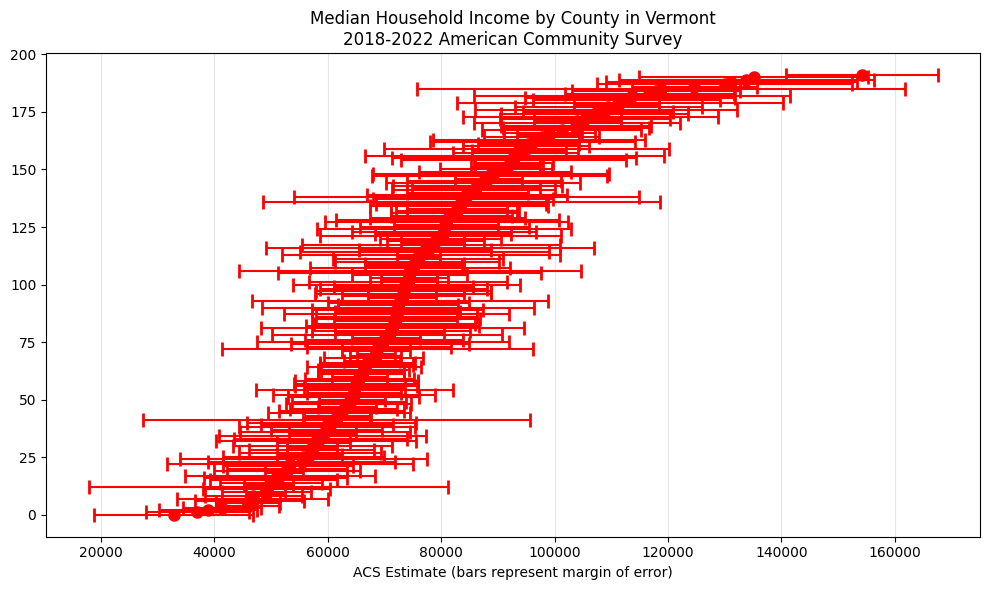

In [22]:
# Clean county names and create visualization
vt_clean = vt_income.copy()
vt_clean = vt_clean.sort_values("medincome")
vt_clean.dropna(subset=["medincome"], inplace=True)
plt.figure(figsize=(10, 6))

# Create error bar plot
plt.errorbar(
    vt_clean["medincome"],
    range(len(vt_clean)),
    xerr=vt_clean["medincome_moe"],  # Using margin of error as error bars
    fmt="o",
    color="red",
    markersize=8,
    capsize=5,
    capthick=2,
)

plt.xlabel('ACS Estimate (bars represent margin of error)')
plt.title('Median Household Income by County in Vermont\n2018-2022 American Community Survey')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Data Output Formats

By default, pytidycensus returns data in "tidy" format. You can also request "wide" format:

### Tidy Format (Default)

In [23]:
# Multiple variables in tidy format
ca_demo_tidy = tc.get_acs(
    geography="county",
    variables={
        "total_pop": "B01003_001",
        "median_income": "B19013_001",
        "median_age": "B01002_001"
    },
    state="CA",
    year=2022,
    output="tidy"  # This is the default
)

print(f"Tidy format shape: {ca_demo_tidy.shape}")
ca_demo_tidy 

Getting data from the 2018-2022 5-year ACS
Tidy format shape: (174, 7)


,state,county,GEOID,NAME,variable,estimate,moe
0,06,001,06001,"Alameda County, California",total_pop,1663823.0,NaN
1,06,003,06003,"Alpine County, California",total_pop,1515.0,206.0
2,06,005,06005,"Amador County, California",total_pop,40577.0,NaN
3,06,007,06007,"Butte County, California",total_pop,213605.0,NaN
4,06,009,06009,"Calaveras County, California",total_pop,45674.0,NaN
...,...,...,...,...,...,...,...
169,06,107,06107,"Tulare County, California",median_age,31.5,0.2
170,06,109,06109,"Tuolumne County, California",median_age,48.7,0.4
171,06,111,06111,"Ventura County, California",median_age,39.0,0.2
172,06,113,06113,"Yolo County, California",median_age,32.0,0.2


### Wide Format

In [24]:
# Same data in wide format
ca_demo_wide = tc.get_acs(
    geography="county",
    variables={
        "total_pop": "B01003_001",
        "median_income": "B19013_001", 
        "median_age": "B01002_001"
    },
    state="CA",
    year=2022,
    output="wide"
)

print(f"Wide format shape: {ca_demo_wide.shape}")
ca_demo_wide.head()

Getting data from the 2018-2022 5-year ACS
Wide format shape: (58, 10)


,GEOID,total_pop,median_income,median_age,state,county,NAME,total_pop_moe,median_income_moe,median_age_moe
0,06001,1663823,122488,38.4,06,001,"Alameda County, California",<NA>,1231.0,0.2
1,06003,1515,101125,43.0,06,003,"Alpine County, California",206.0,17442.0,10.5
2,06005,40577,74853,49.6,06,005,"Amador County, California",<NA>,6048.0,0.4
3,06007,213605,66085,36.5,06,007,"Butte County, California",<NA>,2261.0,0.3
4,06009,45674,77526,52.1,06,009,"Calaveras County, California",<NA>,3875.0,0.6


## Multiple Variables Analysis

Let's analyze the relationship between different demographic variables:

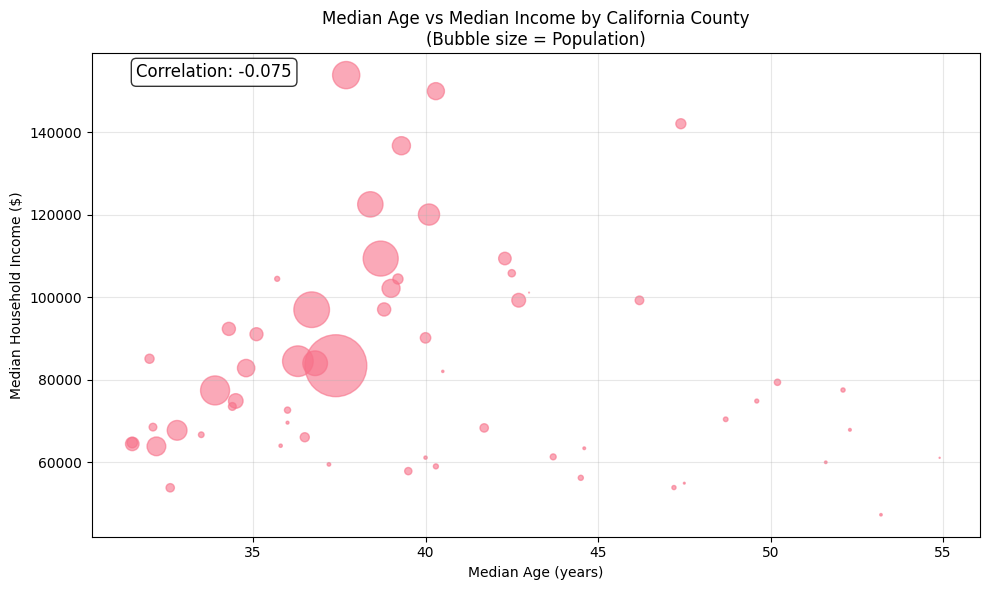

In [25]:
# Create scatter plot of median age vs median income
plt.figure(figsize=(10, 6))

plt.scatter(
    ca_demo_wide['median_age'], 
    ca_demo_wide['median_income'],
    s=ca_demo_wide['total_pop']/5000,  # Size by population
    alpha=0.6
)

plt.xlabel('Median Age (years)')
plt.ylabel('Median Household Income ($)')
plt.title('Median Age vs Median Income by California County\n(Bubble size = Population)')
plt.grid(alpha=0.3)

# Add correlation coefficient
correlation = ca_demo_wide['median_age'].corr(ca_demo_wide['median_income'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Working with Different Survey Types

The ACS has different survey periods:

- **5-year ACS** (`survey="acs5"`): More reliable for small areas, 5-year average
- **1-year ACS** (`survey="acs1"`): More current, only for areas with 65,000+ population

In [26]:
# Compare 1-year vs 5-year estimates for large cities
cities_5yr = tc.get_acs(
    geography="place",
    variables="B19013_001",
    state="CA", 
    year=2022,
    survey="acs5"
)

cities_1yr = tc.get_acs(
    geography="place",
    variables="B19013_001",
    state="CA",
    year=2022, 
    survey="acs1"
)

print(f"5-year ACS places: {len(cities_5yr)}")
print(f"1-year ACS places: {len(cities_1yr)}")
print("\n1-year ACS is only available for larger places:")
cities_1yr.head()

Getting data from the 2018-2022 5-year ACS
Getting data from the 2022 1-year ACS
The 1-year ACS provides data for geographies with populations of 65,000 and greater.
5-year ACS places: 1611
1-year ACS places: 142

1-year ACS is only available for larger places:


,NAME,state,place,GEOID,variable,estimate,moe
0,"Alameda city, California",06,00562,0600562,B19013_001,131116,11963.0
1,"Alhambra city, California",06,00884,0600884,B19013_001,72406,11887.0
2,"Anaheim city, California",06,02000,0602000,B19013_001,85133,4032.0
3,"Antioch city, California",06,02252,0602252,B19013_001,100178,13978.0
4,"Apple Valley town, California",06,02364,0602364,B19013_001,56187,7004.0


## Summary

In this notebook, we learned:

1. **Setup**: How to install pytidycensus and set your API key
2. **Core functions**: `get_decennial()` and `get_acs()` for different data sources
3. **Geographic levels**: From national to neighborhood-level data
4. **Variable search**: Using `load_variables()` and `search_variables()`
5. **Data formats**: Tidy vs wide format output
6. **Uncertainty**: Working with ACS margins of error
7. **Visualization**: Creating plots with matplotlib

## Next Steps

- **Spatial Analysis**: See `02_spatial_data.ipynb` for mapping examples
- **Advanced ACS**: Explore `03_margins_of_error.ipynb` for statistical techniques
- **Other Datasets**: Check `04_other_datasets.ipynb` for population estimates
- **Microdata**: Learn about PUMS data in `05_pums_data.ipynb`

## Resources

- [pytidycensus Documentation](https://mmann1123.github.io/pytidycensus)
- [Census Variable Search](https://api.census.gov/data.html)
- [Census Bureau Data](https://www.census.gov/data.html)